# Uczenie SLP z wykorzystaniem algorytmu genetycznego - część 2

Ten plik zawiera notatnik, w którym wykonuje zadania na ocene 4 i 5.

---

## Przygotowanie środowiska.

Importuję potrzebne biblioteki.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline

Pobieram dane i wyświetlam wszystkie zakodowane litery jak i wektory odpowiedzi, przypisane do mnie.

In [1]:
s = 'letters.data'  # Plik należy pobrać, a następnie umieścić w folderze z projektem lub podać pełną ścieżkę do pliku
print('File:', s.split('/')[-1])
df = pd.read_csv(s,
header=None,
encoding='utf-8')
# ponizej dane z przykładu
# my_cases = '10 11 12 13 14 15 16 17 18 19'
my_cases = '2 4 8 9 12 13 14 17 20 23'
my_cases = list(map(int, my_cases.split()))
print(my_cases)
df = df.iloc[my_cases]
df.head(10)


File: letters.data
[2, 4, 8, 9, 12, 13, 14, 17, 20, 23]


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
2,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,-1,1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,1,1,1,1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
12,1,-1,-1,-1,1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
17,1,1,1,1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
20,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
23,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1


Tworzę zbiory:
- X
    - zbiór liter zakodowany binarnie (-1 zamiast 0) <br><br>
- y
    - zbiór wektorów odpowiedzi

oraz je wyświetlam.

In [2]:
X = df.iloc[:, :35].values
y = df.iloc[:, 35:].values
y = y[:, my_cases]

print(X)
print('\n\n')
print(y)

[[-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1  1  1  1  1]
 [-1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1  1 -1 -1 -1  1  1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1

---

## Klasy

Klasa Perceptron - żadnych zmian względem poprzednich projektów.

In [3]:
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


Klasa SLP - dodano kilka zmian:

- metoda ```create_perceptrons(self, size)``` 
    - tworzy listę perceptronów o podanym rozmiarze. 
    <br><br>
    > *Przydatne przy korzystaniu z algorytmu genetycznego.* 
    <br><br>
- metoda ```predict_weights(self, X, weights)``` 
    - taka sama jak ```predict(self, X)```, lecz w tym przypadku zamieniamy wagi perceptronów, na wagi z wektora podanego w argumencie <br><br>
- metoda ```misclassified_weights(self, y, X, weights)``` 
    - taka sama jak ```misclassified(self, y, X)```, lecz w tym przypadku wywołujemy metodę ```predict_weights(self, X, weights)``` przekazując wartości ```values``` z obiektu typu ```Weight``` podanego w dodatkowym argumencie.

In [4]:
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def create_perceptrons(self, size):
    self.perceptrons_ = []
    for i in range(0, size):
      self.perceptrons_.append(Perceptron(eta=self.eta, n_iter=self.n_iter, random_state=self.random_state))

  def fit(self, X, y):
    self.errors_ = []
    self.perceptrons_ = []
    for i in range(0, len(y)):
      self.perceptrons_.append(Perceptron(eta=self.eta, n_iter=self.n_iter, random_state=self.random_state))
      self.perceptrons_[i].fit(X, y[i])
      if len(self.errors_) == 0:
        self.errors_ = self.perceptrons_[i].errors_
      else:
        self.errors_ = [sum(j) for j in zip(self.errors_, self.perceptrons_[i].errors_)]

  def predict(self, X):
    self.predictions = [0] * len(self.perceptrons_)
    for i in range(0, len(self.perceptrons_)):
      self.predictions[i] = self.perceptrons_[i].predict(X)
    return self.predictions
  
  def misclassified(self, X, y):
    result = 0
    predictions = self.predict(X)
    predictions = [list(map(lambda x: int(x * (-1)), i)) for i in predictions]
    for i in range(0, len(y)):
      result =  result + (sum(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
    return result
      
  def predict_weights(self, X, weights):
    self.predictions = [0] * len(self.perceptrons_)
    for i in range(0, len(self.perceptrons_)):
      start_weights = i * (1 + X.shape[1])
      end_weights = (i + 1) * (1 + X.shape[1])

      self.perceptrons_[i].w_ = weights[start_weights:end_weights]
      self.predictions[i] = self.perceptrons_[i].predict(X)

    return self.predictions

  def misclassified_weights(self, X, y, weights):
    result = 0
    predictions = self.predict_weights(X, weights.values)
    predictions = [list(map(lambda x: int(x * (-1)), i)) for i in predictions]
    for i in range(0, len(y)):
      result += (sum(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
    return result

  def show(self, X):
    _, axs = plt.subplots(2, 5, figsize=(14, 8), sharex='col', sharey='row')

    for i, x in enumerate(X):
      ax = axs[i // 5, i % 5]
      ax.imshow(x.reshape(7, 5), cmap='binary')

    plt.show()

Klasa Weight:
- atrybuty:
    - ```values``` -> wektor, który reprezentuje wagi przekazywane do perceptronów.
    - ```errors``` -> liczba całkowita, która zawiera informację o ilości popełnionych błędów przy próbie predykcji za pomocą wag z wektora ```values```.
    <br><br>
- metoda ```set_random(self, lower_bound=-100, upper_bound=100)``` 
    - ustawia losowe wartości wag z podanego w argumentach zakresu.
<br><br>
- metoda ```fit(self, X, y)``` 
    - dokonuje oceny wag zawartych w atrybucie ```values``` i zapisuje ilość błędów do zmiennej ```errors```.

In [5]:
class Weight:
    def __init__(self, slp, values):
        self.slp = slp
        self.values = values
        self.errors = 0

    def set_random(self, lower_bound=-100, upper_bound=100):
        for i in range(0, len(self.values)):
            self.values[i] = random.uniform(lower_bound, upper_bound)

    def fit(self, X, y):
        self.errors = self.slp.misclassified_weights(X, y, self)

Klasa Gen_SLP:
- atrybuty:
    - ```slp``` -> obiekt typu ```SLP``` wykorzystywany do predykcji.
    - ```max_iter``` -> liczba całkowita, która określa maksymalną ilość iteracji algorytmu genetycznego.
    - ```size``` -> liczba całkowita, która określa rozmiar populacji.
    - ```lower_bound``` -> liczba całkowita, która określa dolny zakres losowania wag.
    - ```upper_bound``` -> liczba całkowita, która określa górny zakres losowania wag.
    - ```random_state``` -> liczba całkowita, która określa ziarno losowania.
    - ```best_errors``` -> lista, która zawiera informację o ilości błędów najlepszego osobnika w każdej iteracji.
    - ```avg_errors``` -> lista, która zawiera informację o średniej ilości błędów w każdej iteracji.
    - ```weights``` -> lista, która zawiera obiekty typu ```Weight```, które reprezentują osobniki w populacji.
    <br><br>
- metoda ```sort_weights(self, low, high)``` 
    - sortuje osobniki w populacji według ilości błędów, od najmniejszej do największej, za pomocą algorytmu sortowania szybkiego.
    <br><br>
- metoda ```next_generation(self)``` 
    - tworzy nową populację na podstawie instrukcji podanych w zadaniu.
    <br><br>
- metoda ```append_stats(self)``` 
    - dodaje do list ```best_errors``` i ```avg_errors``` informacje o ilości błędów najlepszego osobnika i średniej ilości błędów w populacji.
    <br><br>
- metoda ```show_stats(self)``` 
    - wyświetla wykres ilości błędów najlepszego osobnika i średniej ilości błędów w populacji w każdej iteracji.
    <br><br>
- metoda ```fit(self, X, y)``` 
    - rozpoczyna proces uczenia algorytmu genetycznego.

In [6]:
class Gen_SLP:
    def __init__(self, slp, max_iter=1000, size=100, lower_bound=-100, upper_bound=100, random_state=1):
        random.seed(random_state)
        self.slp = slp
        self.max_iter = max_iter
        self.size = size
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.random_state = random_state

        self.best_errors = []
        self.avg_errors = []

        self.weights = []

    def sort_weights(self, low, high):
        if low < high:
            pivot = self.weights[high-1]
            i = low
            for x in range(low, high-1):
                if self.weights[x].errors <= pivot.errors:
                    (self.weights[i], self.weights[x]) = (self.weights[x], self.weights[i])
                    i = i + 1
 
            (self.weights[i], self.weights[high - 1]) = (self.weights[high - 1], self.weights[i])

            pi = i
 
            self.sort_weights(low, pi)
            self.sort_weights(pi + 1, high)

    def next_generation(self):
        new_weights = []
        for i in range(0, self.size // 10):
            new_weights.append(self.weights[i])

        for i in range(self.size // 10, self.size):
            p1 = 0
            p2 = 0
            while p1 == p2:
                p1 = random.randint(0,49)
                p2 = random.randint(0,49)

            par1 = self.weights[p1]
            par2 = self.weights[p2]

            mutation = Weight(self.slp, [0] * len(self.weights[0].values))
            mutation.set_random(self.lower_bound, self.upper_bound)

            for y in range(0, len(mutation.values)):
                r = random.random()
                if r < 0.45:
                    mutation.values[y] = par1.values[y]
                elif r >= 0.45 and r < 0.90:
                    mutation.values[y] = par2.values[y]
      
            new_weights.append(mutation)
            
        self.weights = new_weights
        return new_weights    

    def append_stats(self):
        self.best_errors.append(self.weights[0].errors)
        self.avg_errors.append(sum([x.errors for x in self.weights]) / self.size)

    def show_stats(self):
        plt.plot(range(0, len(self.best_errors)), self.best_errors, marker='o', label='Najlepszy wynik')
        plt.plot(range(0, len(self.avg_errors)), self.avg_errors, marker='o', label='Średni wynik')
        plt.xlabel('Generacja')
        plt.ylabel('Ilość błędów')
        plt.legend()
        plt.show()

    def fit(self, X, y):
        self.weights = []
        for i in range(0, self.size):
            self.weights.append(Weight(self.slp, [0] * ((1 + X.shape[1]) * len(y))))
            self.weights[i].set_random(self.lower_bound, self.upper_bound)
            self.weights[i].fit(X, y)
        
        self.sort_weights(0, self.size)
        self.append_stats()

        print('Iteracja 1: ')
        print(f'Najlepszy wynik:\n Ilość błędów: {self.best_errors[0]}')
        print(f'Średni wynik:\n Ilość błędów: {self.avg_errors[0]}')
        
        print(self.weights[0].values)

        for i in range(1, self.max_iter):
            self.weights = self.next_generation()
            for x in self.weights:
                x.fit(X, y)
            self.sort_weights(0, self.size)
            self.append_stats()

            if self.best_errors[i] == 0:
                print("ZAKONCZONO")
                print(f'Iteracja {i + 1}: ')
                print(f'Najlepszy wynik:\n Ilość błędów: {self.best_errors[i]}')
                print(f'Średni wynik:\n Ilość błędów: {self.avg_errors[i]}')
                # print(f'Najlepsze wagi: {self.weights[0].values}')
                self.show_stats()
                break

            # do sprawdzania postępu algorytmu:
            
            # if (i + 1) % 10 == 0:
            #     print(f'Iteracja {i + 1}: ')
            #     print(f'Najlepszy wynik:\n Ilość błędów: {self.best_errors[i]}')
            #     print(f'Średni wynik:\n Ilość błędów: {self.avg_errors[i]}')
            #     # print(f'Najlepsze wagi: {self.weights[40].values}')

---

## Testowanie zwykłego uczenia linowego SLP.

Tworzony jest obiekt typu ```SLP``` i wywoływana jest metoda ```show(X)```, która wyświetla wszystkie zakodowane litery w postaci graficznej.

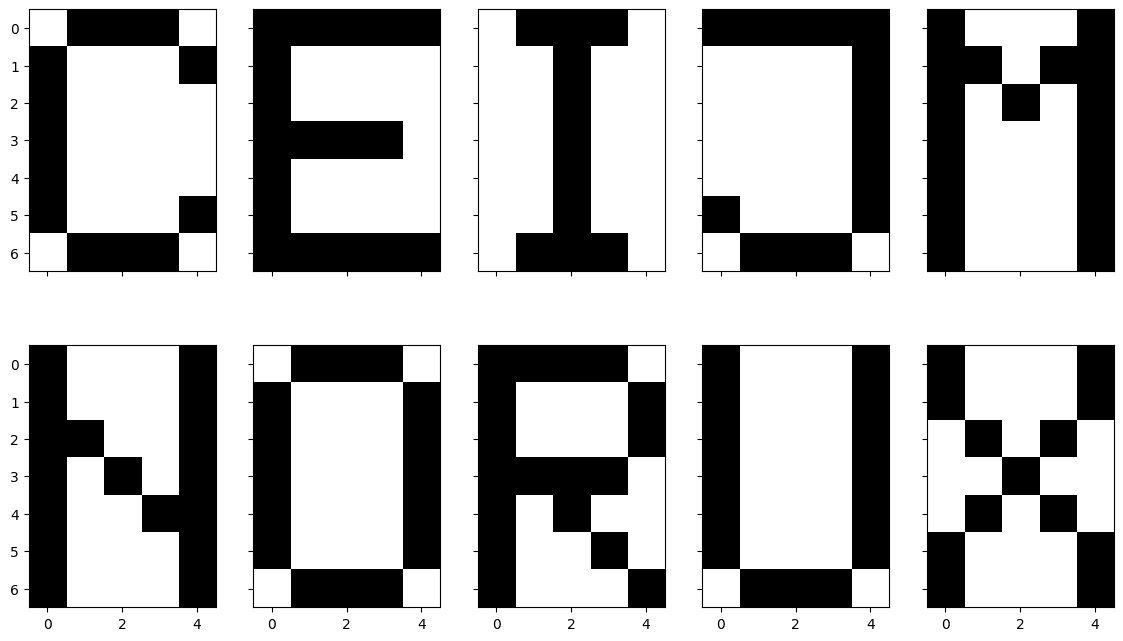

In [7]:
net = SLP()
net.show(X)

Następnie dokonuje ucznia SLP za pomocą metody ```fit(X, y)``` oraz wyświetlam informacje takie jak:
- ilość błędów pod koniec uczenia
- ilość błędów w każdej epoce
- wykres ilości błędów w każdej epoce

Liczba błędnie sklasyfikowanych próbek: 0
Tablica błędów w kolejnych epokach: [29, 14, 8, 2, 0, 0, 0, 0, 0, 0]


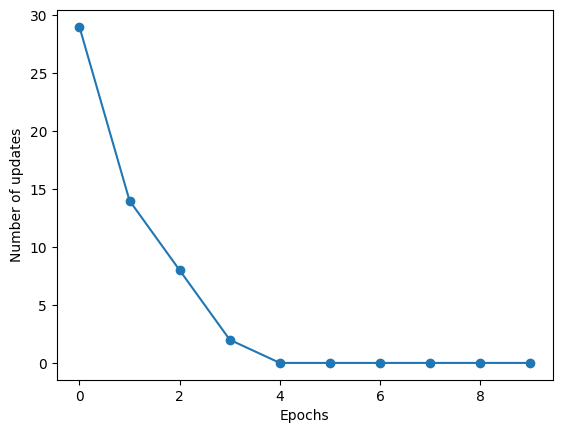

CPU times: total: 78.1 ms
Wall time: 79.1 ms


In [8]:
%%time
net.fit(X, y)
print(f'Liczba błędnie sklasyfikowanych próbek: {net.misclassified(X, y)}')
print(f'Tablica błędów w kolejnych epokach: {net.errors_}')
plt.plot(range(0, len(net.errors_) ), net.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Jak widać, SLP nauczył się poprawnie rozpoznawać wszystkie litery w 4 epoce, a czas uczenia wyniósł zaledwie 0.08 sekundy.

Dla pewności wyświetlam wynik wywołania metody ```predict(X)```, która zwraca listę przewidzianych odpowiedzi.
Jedynki są na tych samych pozycjach co w wektorach odpowiedzi (na ukos od najbardziej lewego do najbardziej prawego), co oznacza, że SLP poprawnie rozpoznaje wszystkie litery.

In [9]:
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

---

## Testowanie algorytmu genetycznego.

Tworzony jest obiekt typu ```Gen_SLP``` i dokonywane jest uczenie.
> W tym przypadku, zwiększyłem wielkość populacji do 1000, gdyż usprałniło to proces uczenia.

Iteracja 1: 
Najlepszy wynik:
 Ilość błędów: 27
Średni wynik:
 Ilość błędów: 49.776
[-0.8899283422900788, 0.8544948141841824, -0.7943881215726885, 0.7610879530145938, 0.9732323402095262, -0.8546495290036005, 0.17015085860472867, -0.0066636184685267, 0.7960082462513569, 0.7428500573952754, -0.3744852859411236, 0.1399544745287331, -0.7327979865762599, -0.19790248304233704, 0.023750730381679963, -0.7289431227613907, -0.11756130777007212, 0.642317262674696, 0.12720446368704397, -0.5841119297388915, -0.5814262325403936, 0.9665873883996376, 0.812122719670878, 0.6419197762665003, -0.9507969944657444, 0.969554755487533, -0.7816568333910912, 0.1751167446538957, 0.969756874035959, 0.2584425894051525, 0.44650501263017306, -0.5215604654186767, -0.9978443308659959, 0.04016298752089331, -0.9465000326280462, -0.06603355626951823, -0.23682392692239151, -0.6738822827614201, -0.7154399111947909, -0.26301751186504396, -0.06423113223382848, 0.2695334868777459, -0.9266350095723759, 0.06795862811857978, -0.

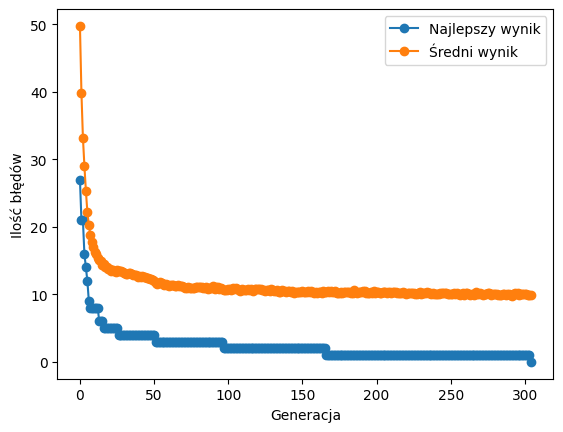

CPU times: total: 57.1 s
Wall time: 57.2 s


In [23]:
%%time
slp = SLP()
slp.create_perceptrons(len(y))
ga = Gen_SLP(net, max_iter=1000, size=1000, lower_bound=-1, upper_bound=1, random_state=1)
ga.fit(X, y)

Algorytm genetyczny nauczył się poprawnie rozpoznawać wszystkie litery w aż 305 iteracji, a czas uczenia wyniósł 57 sekund.

Tak samo jak wcześniej, wyświetlam wynik wywołania metody ```predict_weights(X, ga.weights[0].values)```, która zwraca listę przewidzianych odpowiedzi.
> W tym przypadku, wykorzystujemy wagi najlepszego osobnika, który znajduje się na początku listy ```ga.weights```.

In [11]:
net.predict_weights(X, ga.weights[0].values)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

---

## Testowanie wag na uszkodzonych danych.

Tworzę funkcję ```damage(X, percent, seed=1)```, która uszkadza dane w podanym procentowym zakresie.
> funkcja zaimplementowana z pliku *WDSSI_perce.pdf* znajdującego się na kampusie.

In [12]:
def damage(X, percent, seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1], count, replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel] *= -1
  
  return result

Następnie tworzę 3 zbiory danych, które są uszkodzone w 5, 15 i 40 procentach.

In [13]:
damaged5 = damage(X, 5)
damaged15 = damage(X, 15)
damaged40 = damage(X, 40) 

Wyświetlam graficznie pierwszy zbiór danych, który jest uszkodzony w 5 procentach.

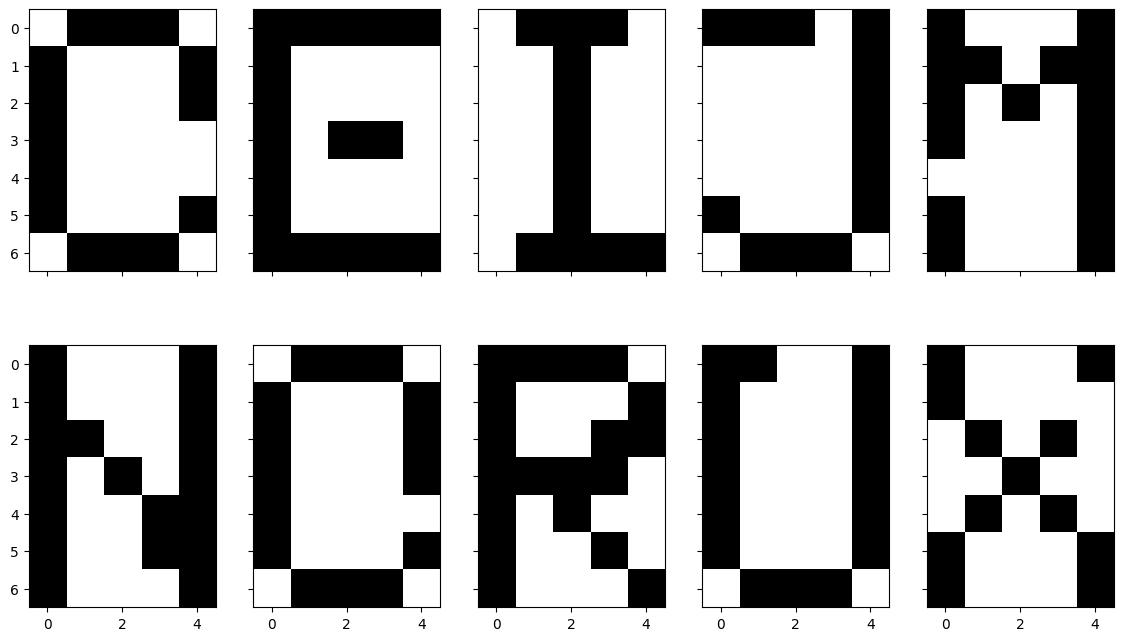

In [14]:
net.show(damaged5)

Wywołuje metodę ```predict_weights(X, ga.weights[0].values)``` na uszkodzonych danych.

In [15]:
print(net.predict_weights(damaged5, ga.weights[0].values))

[array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1]), array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1,  1, -1,  1, -1,  1]), array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]), array([-1, -1, -1, -1, -1,  1, -1,  1, -1, -1]), array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]


Następnie wyświetlam ilość błędów. 

In [16]:
print(net.misclassified_weights(damaged5, y, ga.weights[0]))

9


> 9 błędnch odpowiedzi.

Wyświetlam graficznie drugi zbiór danych, który jest uszkodzony w 15 procentach.

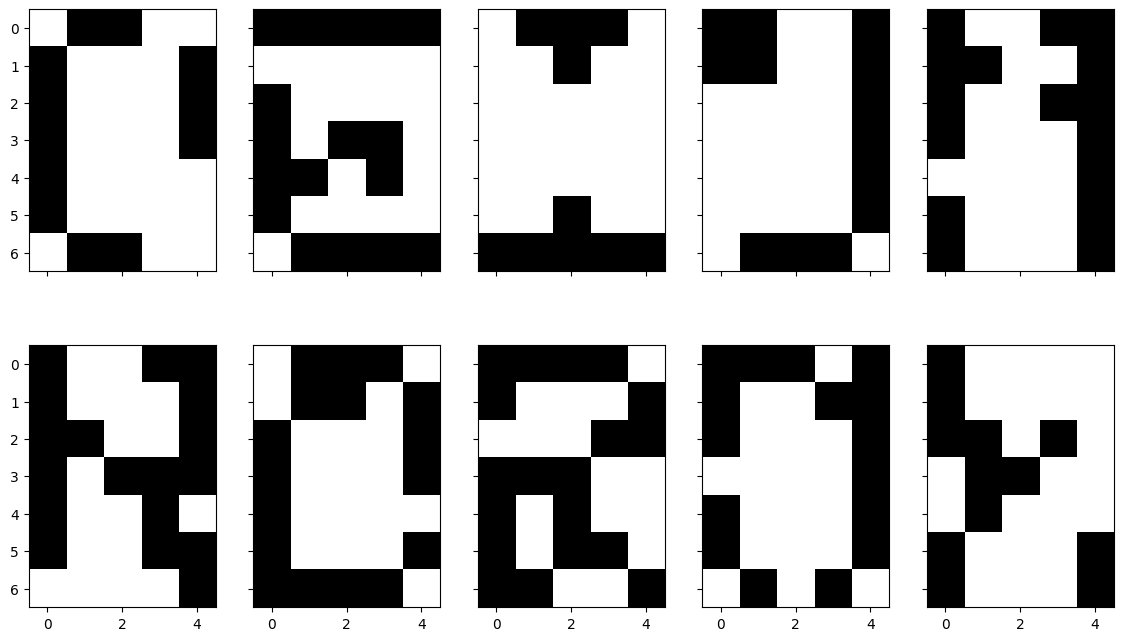

In [17]:
net.show(damaged15)

Wywołuje metodę ```predict_weights(X, ga.weights[0].values)``` na uszkodzonych danych.

In [18]:
print(net.predict_weights(damaged15, ga.weights[0].values))

[array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1]), array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1]), array([ 1, -1, -1, -1, -1, -1,  1, -1, -1, -1]), array([-1, -1, -1,  1, -1, -1, -1, -1,  1, -1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1,  1, -1, -1, -1,  1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]), array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]), array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]), array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1])]


Następnie wyświetlam ilość błędów. 

In [19]:
print(net.misclassified_weights(damaged15, y, ga.weights[0]))

16


> 16 błędnch odpowiedzi.

Wyświetlam graficznie trzeci zbiór danych, który jest uszkodzony w 40 procentach.

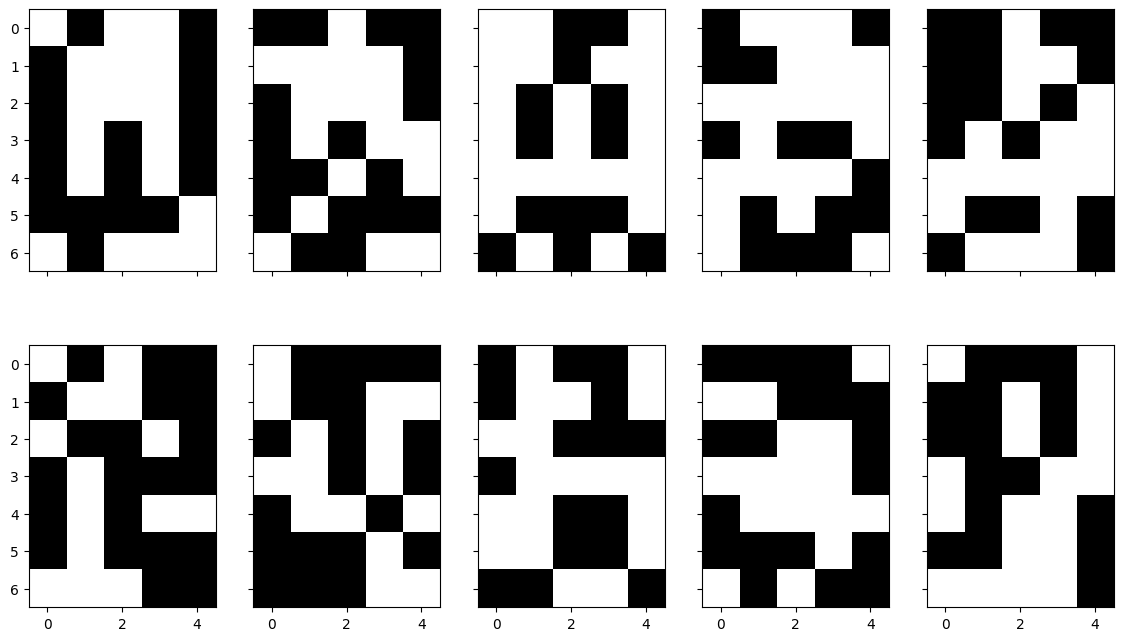

In [20]:
net.show(damaged40)

Wywołuje metodę ```predict_weights(X, ga.weights[0].values)``` na uszkodzonych danych.

In [21]:
print(net.predict_weights(damaged40, ga.weights[0].values))

[array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1]), array([-1, -1,  1,  1,  1, -1, -1,  1, -1,  1]), array([ 1, -1,  1, -1, -1, -1,  1, -1, -1, -1]), array([-1, -1, -1, -1, -1, -1,  1, -1,  1,  1]), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]), array([ 1,  1, -1, -1, -1,  1, -1,  1,  1, -1]), array([ 1, -1, -1,  1, -1, -1,  1, -1, -1, -1]), array([ 1, -1,  1, -1, -1,  1, -1, -1, -1, -1]), array([-1, -1, -1,  1, -1, -1, -1, -1,  1, -1]), array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1])]


Następnie wyświetlam ilość błędów.

In [22]:
print(net.misclassified_weights(damaged40, y, ga.weights[0]))

28


> 28 błędnch odpowiedzi.